# **Elaboration of a Nutri-Score model based on a simple sorting  \(ordered classification)model**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Firstly, we constructed profiles for the Electre-Tri model.Here we used percentile-based divisions named Quintile


Thresholds Table:
Attribute           Threshold 1    Threshold 2    Threshold 3    Threshold 4    
Energy (KJ/100g)    1402.6         1670.8         1905.6         2190.0         
Sugars (g/100g)     2.5            7.18           18.6           31.8           
Saturated Fat (g/100g)0.8            2.24           6.76           15.9           
Salt (g/100g)       0.06           0.3            0.65           1.0            
Proteins (g/100g)   11.0           8.6            7.1            5.3            
Fiber (g/100g)      7.13           4.8            2.8            0.5            
Fruit/Veg (%)       0.0            0.0            0.0            0.0            


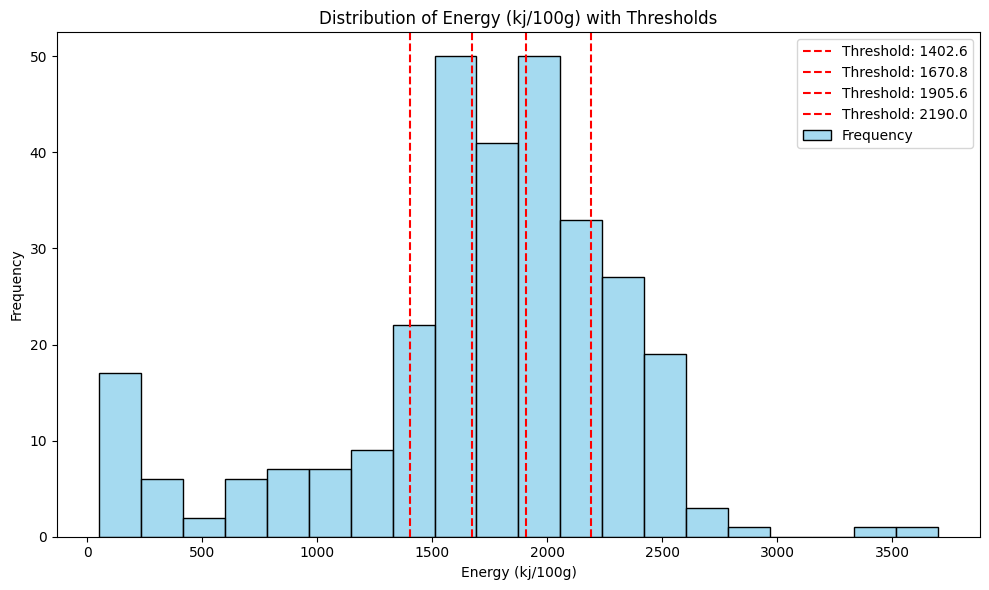

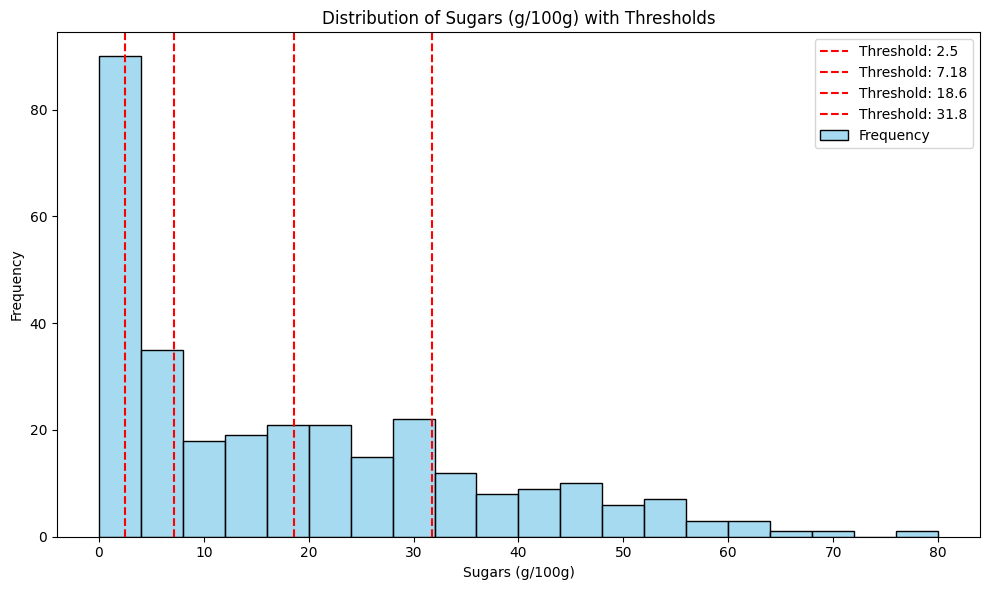

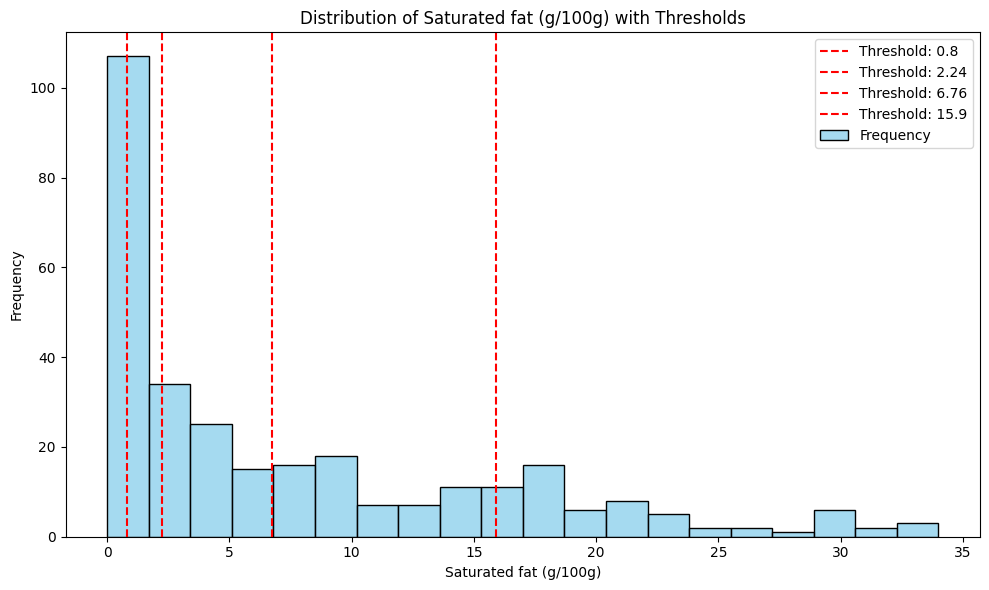

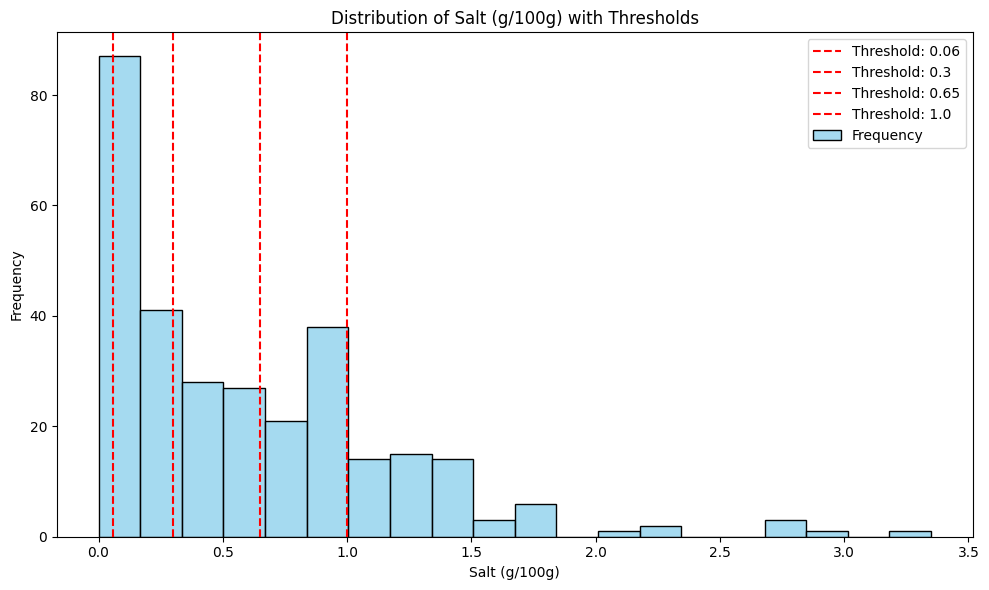

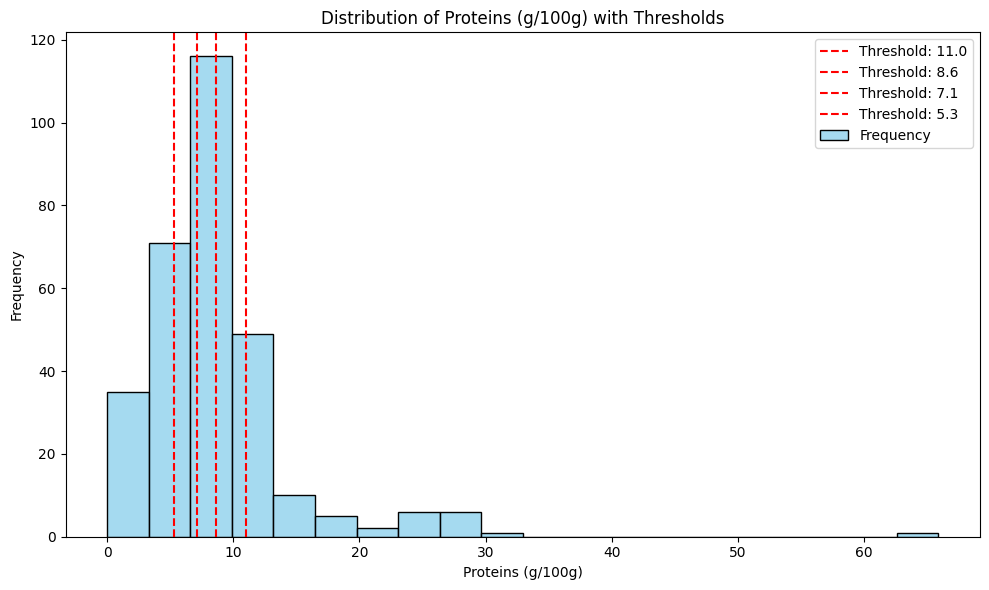

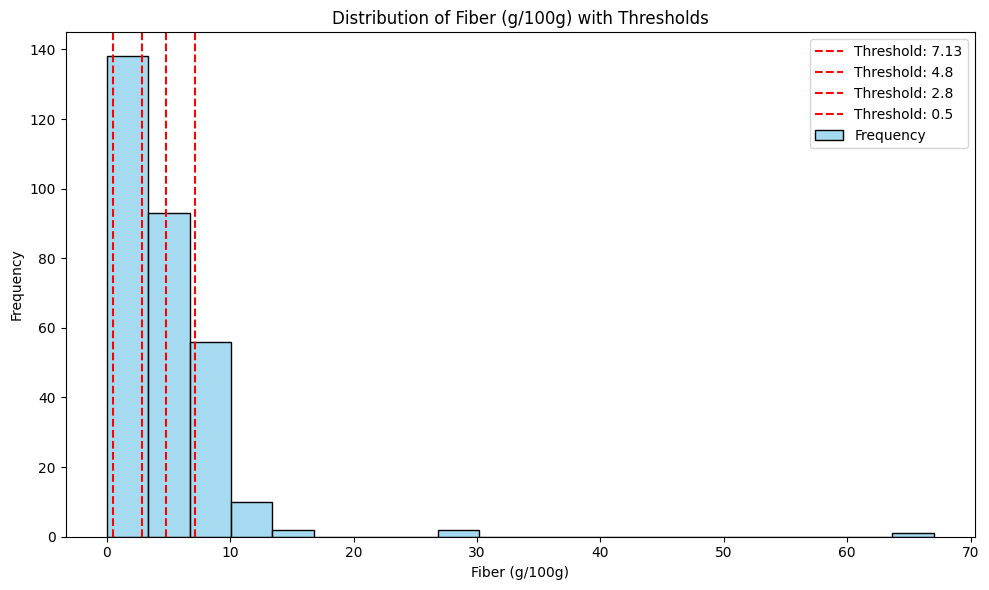

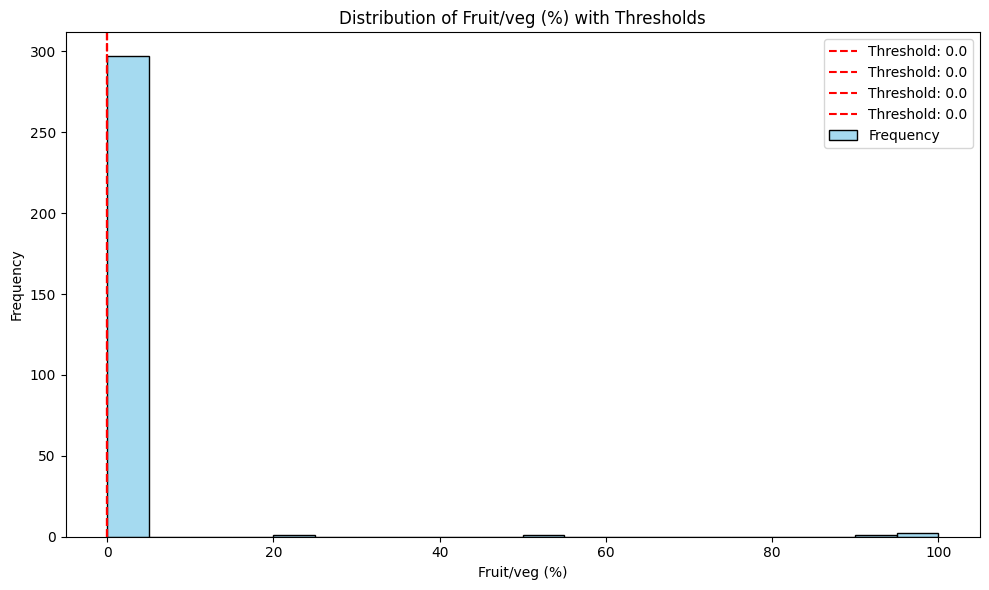

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data (adjust the file path if needed)
file_path = "/content/drive/MyDrive/Colab Notebooks/DM_Sacaly/food_data_cleaned1.xlsx"
data = pd.read_excel(file_path)

# Features to analyze
features = [
    "Energy (KJ/100g)", "Sugars (g/100g)", "Saturated Fat (g/100g)",
    "Salt (g/100g)", "Proteins (g/100g)", "Fiber (g/100g)", "Fruit/Veg (%)"
]

# Calculate quintiles and thresholds
thresholds = {}
for feature in features:
    thresholds[feature] = data[feature].quantile([0.2, 0.4, 0.6, 0.8]).round(2).tolist()

# Adjust thresholds for features that should be maximized
for feature in ["Proteins (g/100g)", "Fiber (g/100g)", "Fruit/Veg (%)"]:
    thresholds[feature].reverse()

# Function to print thresholds in a table format
def print_thresholds_table(thresholds):
    """
    Print thresholds for each attribute in a formatted table.
    """
    print("\nThresholds Table:")
    print(f"{'Attribute':<20}{'Threshold 1':<15}{'Threshold 2':<15}{'Threshold 3':<15}{'Threshold 4':<15}")
    print("=" * 80)
    for column, values in thresholds.items():
        print(f"{column:<20}{values[0]:<15}{values[1]:<15}{values[2]:<15}{values[3]:<15}")

# Print the thresholds table
print_thresholds_table(thresholds)

# Visualize thresholds with histograms
for column in features:
    # Extract the thresholds for the current column
    thresholds_column = thresholds[column]

    # Plot the histogram of the data
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=20, kde=False, color="skyblue", label="Frequency")

    # Plot the thresholds as vertical lines
    for threshold in thresholds_column:
        plt.axvline(threshold, color="red", linestyle="--", label=f"Threshold: {threshold}")

    # Add titles and labels
    plt.title(f"Distribution of {column.capitalize()} with Thresholds")
    plt.xlabel(column.capitalize())
    plt.ylabel("Frequency")
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.show()


Here we built the functions PessimisticmajoritySorting and Optimistic majority Sorting, respectively based on the Pessimistic and Optimistic version of ELECTRE-Tri, which returns an Excel file containing the classified foods in the
previous five Nutri-Score labels.

## This part we used provided weights(4,3,3,3,2,2,1)

Here it followed $\lambda$ in increasing order from 0.5 to 0.7.

Thresholds for each feature:
   Energy (KJ/100g)  Sugars (g/100g)  Saturated Fat (g/100g)  Salt (g/100g)  \
0            1402.6             2.50                    0.80           0.06   
1            1670.8             7.18                    2.24           0.30   
2            1905.6            18.60                    6.76           0.65   
3            2190.0            31.80                   15.90           1.00   

   Proteins (g/100g)  Fiber (g/100g)  Fruit/Veg (%)  
0               11.0            7.13            0.0  
1                8.6            4.80            0.0  
2                7.1            2.80            0.0  
3                5.3            0.50            0.0  


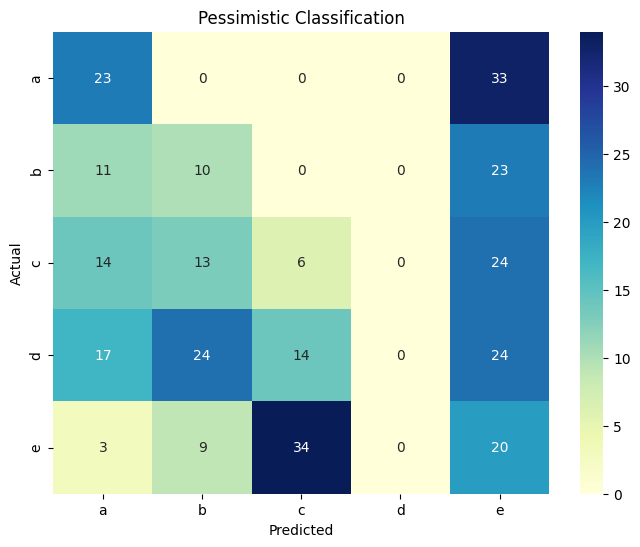

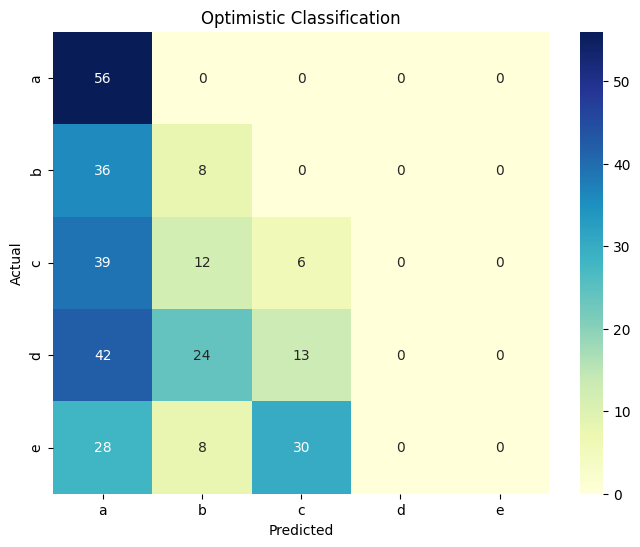

Classification Report for Pessimistic Classification:
              precision    recall  f1-score   support

           a       0.34      0.41      0.37        56
           b       0.18      0.23      0.20        44
           c       0.11      0.11      0.11        57
           d       0.00      0.00      0.00        79
           e       0.16      0.30      0.21        66

    accuracy                           0.20       302
   macro avg       0.16      0.21      0.18       302
weighted avg       0.14      0.20      0.16       302

Classification Report for Optimistic Classification:
              precision    recall  f1-score   support

           a       0.28      1.00      0.44        56
           b       0.15      0.18      0.17        44
           c       0.12      0.11      0.11        57
           d       0.00      0.00      0.00        79
           e       0.00      0.00      0.00        66

    accuracy                           0.23       302
   macro avg       0.11 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Results saved to /content/drive/MyDrive/Colab Notebooks/DM_Sacaly/food_data_classified1.xlsx


In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# File paths
input_file = "/content/drive/MyDrive/Colab Notebooks/DM_Sacaly/food_data_cleaned1.xlsx"
output_file = "/content/drive/MyDrive/Colab Notebooks/DM_Sacaly/food_data_classified1.xlsx"

# Load the data
data = pd.read_excel(input_file)

# Features to analyze
features = [
    "Energy (KJ/100g)", "Sugars (g/100g)", "Saturated Fat (g/100g)",
    "Salt (g/100g)", "Proteins (g/100g)", "Fiber (g/100g)", "Fruit/Veg (%)"
]

# Weights
weights = {
    "Energy (KJ/100g)": 4,
    "Sugars (g/100g)": 3,
    "Saturated Fat (g/100g)": 3,
    "Salt (g/100g)": 3,
    "Proteins (g/100g)": 2,
    "Fiber (g/100g)": 2,
    "Fruit/Veg (%)": 1
}

# Calculate quintiles and thresholds
thresholds = {}
for feature in features:
    thresholds[feature] = data[feature].quantile([0.2, 0.4, 0.6, 0.8]).round(2).tolist()

# Adjust thresholds for features that should be maximized
for feature in ["Proteins (g/100g)", "Fiber (g/100g)", "Fruit/Veg (%)"]:
    thresholds[feature].reverse()

# Output thresholds
thresholds_df = pd.DataFrame(thresholds)
print("Thresholds for each feature:")
print(thresholds_df)

# Function to calculate concordance index
def calculate_concordance(row, weights, profile, criteria):
    concordance = 0
    total_weight = sum(weights.values())
    for criterion in criteria:
        if weights[criterion] > 0:  # If the criterion is important
            if row[criterion] >= profile[criterion]:  # At least as good for minimization
                concordance += weights[criterion]
    return concordance / total_weight

def pessimistic_sorting(data, thresholds, lambda_threshold, weights, labels):
    classifications = []
    for _, row in data.iterrows():
        assigned_label = labels[-1]  # Default to the worst category
        for k in range(len(labels) - 1, -1, -1):  # From best to worst
            profile = {criterion: thresholds[criterion][min(k, len(thresholds[criterion]) - 1)] for criterion in thresholds}
            concordance = calculate_concordance(row, weights, profile, thresholds.keys())
            if concordance >= lambda_threshold:
                assigned_label = labels[k]
                break
        classifications.append(assigned_label)
    return classifications

def optimistic_sorting(data, thresholds, lambda_threshold, weights, labels):
    classifications = []
    for _, row in data.iterrows():
        assigned_label = labels[0]  # Default to the best category
        for k in range(len(labels)):  # From worst to best
            profile = {criterion: thresholds[criterion][min(k, len(thresholds[criterion]) - 1)] for criterion in thresholds}
            concordance = calculate_concordance(row, weights, profile, thresholds.keys())
            if concordance < lambda_threshold:
                assigned_label = labels[max(0, k - 1)]
                break
        classifications.append(assigned_label)
    return classifications

# Nutri-Score labels
labels = ["a", "b", "c", "d", "e"]

# Lambda threshold
lambda_threshold = 0.7

# Perform pessimistic and optimistic sorting
data["Pessimistic Classification"] = pessimistic_sorting(data, thresholds, lambda_threshold, weights, labels)
data["Optimistic Classification"] = optimistic_sorting(data, thresholds, lambda_threshold, weights, labels)

# Compare with real Nutri-Score using confusion matrices
def plot_confusion_matrix(true_labels, predicted_labels, title):
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Confusion matrix for pessimistic classification
plot_confusion_matrix(data["Nutri-Score"], data["Pessimistic Classification"], "Pessimistic Classification")

# Confusion matrix for optimistic classification
plot_confusion_matrix(data["Nutri-Score"], data["Optimistic Classification"], "Optimistic Classification")

# Generate classification report for both methods
print("Classification Report for Pessimistic Classification:")
print(classification_report(data["Nutri-Score"], data["Pessimistic Classification"], labels=labels))

print("Classification Report for Optimistic Classification:")
print(classification_report(data["Nutri-Score"], data["Optimistic Classification"], labels=labels))

# Save results to Excel
data.to_excel(output_file, index=False)
print(f"Results saved to {output_file}")


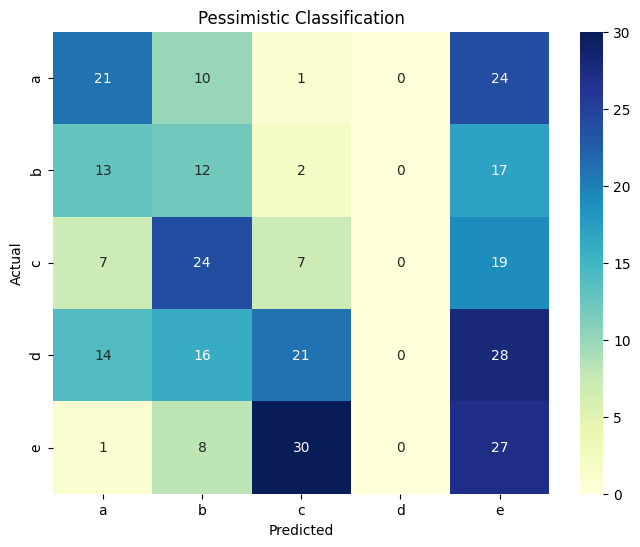

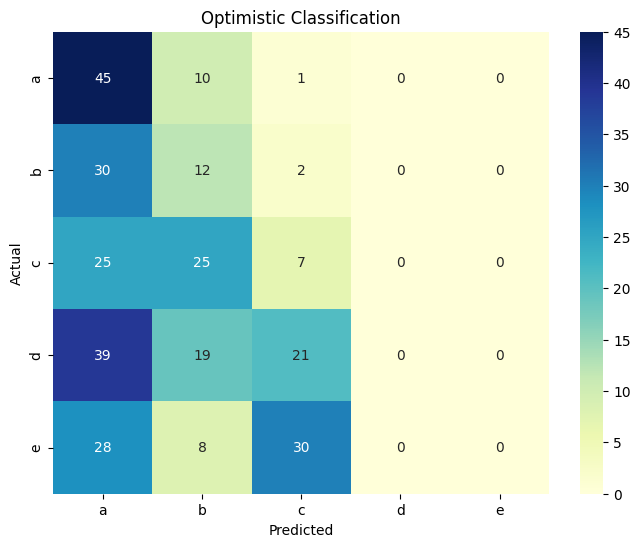

Classification Report for Pessimistic Classification:
              precision    recall  f1-score   support

           a       0.38      0.38      0.38        56
           b       0.17      0.27      0.21        44
           c       0.11      0.12      0.12        57
           d       0.00      0.00      0.00        79
           e       0.23      0.41      0.30        66

    accuracy                           0.22       302
   macro avg       0.18      0.24      0.20       302
weighted avg       0.17      0.22      0.19       302

Classification Report for Optimistic Classification:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

              precision    recall  f1-score   support

           a       0.27      0.80      0.40        56
           b       0.16      0.27      0.20        44
           c       0.11      0.12      0.12        57
           d       0.00      0.00      0.00        79
           e       0.00      0.00      0.00        66

    accuracy                           0.21       302
   macro avg       0.11      0.24      0.15       302
weighted avg       0.10      0.21      0.13       302

Pessimistic Overall Metrics: {'Accuracy': 0.22185430463576158, 'Precision': 0.16748176464678002, 'Recall': 0.22185430463576158, 'F1-Score': 0.18780290560910678}
Optimistic Overall Metrics: {'Accuracy': 0.22185430463576158, 'Precision': 0.16748176464678002, 'Recall': 0.22185430463576158, 'F1-Score': 0.18780290560910678}
Results saved to /content/drive/MyDrive/Colab Notebooks/DM_Sacaly/food_data_classified2.xlsx


In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# File paths
input_file = "/content/drive/MyDrive/Colab Notebooks/DM_Sacaly/food_data_cleaned1.xlsx"
output_file = "/content/drive/MyDrive/Colab Notebooks/DM_Sacaly/food_data_classified2.xlsx"

# Load the data
data = pd.read_excel(input_file)

# Features to analyze
features = [
    "Energy (KJ/100g)", "Sugars (g/100g)", "Saturated Fat (g/100g)",
    "Salt (g/100g)", "Proteins (g/100g)", "Fiber (g/100g)", "Fruit/Veg (%)"
]

# Weights
weights = {
    "Energy (KJ/100g)": 4,
    "Sugars (g/100g)": 3,
    "Saturated Fat (g/100g)": 3,
    "Salt (g/100g)": 3,
    "Proteins (g/100g)": 2,
    "Fiber (g/100g)": 2,
    "Fruit/Veg (%)": 1
}

# Calculate quintiles and thresholds
thresholds = {}
for feature in features:
    thresholds[feature] = data[feature].quantile([0.2, 0.4, 0.6, 0.8]).round(2).tolist()

# Adjust thresholds for features that should be maximized
for feature in ["Proteins (g/100g)", "Fiber (g/100g)", "Fruit/Veg (%)"]:
    thresholds[feature].reverse()

# Function to calculate concordance index
def calculate_concordance(row, weights, profile, criteria):
    concordance = 0
    total_weight = sum(weights.values())
    for criterion in criteria:
        if weights[criterion] > 0:  # If the criterion is important
            if row[criterion] >= profile[criterion]:  # At least as good for minimization
                concordance += weights[criterion]
    return concordance / total_weight

def pessimistic_sorting(data, thresholds, lambda_threshold, weights, labels):
    classifications = []
    for _, row in data.iterrows():
        assigned_label = labels[-1]  # Default to the worst category
        for k in range(len(labels) - 1, -1, -1):  # From best to worst
            profile = {criterion: thresholds[criterion][min(k, len(thresholds[criterion]) - 1)] for criterion in thresholds}
            concordance = calculate_concordance(row, weights, profile, thresholds.keys())
            if concordance >= lambda_threshold:
                assigned_label = labels[k]
                break
        classifications.append(assigned_label)
    return classifications

def optimistic_sorting(data, thresholds, lambda_threshold, weights, labels):
    classifications = []
    for _, row in data.iterrows():
        assigned_label = labels[0]  # Default to the best category
        for k in range(len(labels)):  # From worst to best
            profile = {criterion: thresholds[criterion][min(k, len(thresholds[criterion]) - 1)] for criterion in thresholds}
            concordance = calculate_concordance(row, weights, profile, thresholds.keys())
            if concordance < lambda_threshold:
                assigned_label = labels[max(0, k - 1)]
                break
        classifications.append(assigned_label)
    return classifications

# Nutri-Score labels
labels = ["a", "b", "c", "d", "e"]

# Lambda threshold
lambda_threshold = 0.6

# Perform pessimistic and optimistic sorting
data["Pessimistic Classification"] = pessimistic_sorting(data, thresholds, lambda_threshold, weights, labels)
data["Optimistic Classification"] = optimistic_sorting(data, thresholds, lambda_threshold, weights, labels)

# Compare with real Nutri-Score using confusion matrices
def plot_confusion_matrix(true_labels, predicted_labels, title):
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Confusion matrix for pessimistic classification
plot_confusion_matrix(data["Nutri-Score"], data["Pessimistic Classification"], "Pessimistic Classification")

# Confusion matrix for optimistic classification
plot_confusion_matrix(data["Nutri-Score"], data["Optimistic Classification"], "Optimistic Classification")

# Generate classification report for both methods
print("Classification Report for Pessimistic Classification:")
pessimistic_report = classification_report(data["Nutri-Score"], data["Pessimistic Classification"], labels=labels, output_dict=True)
print(classification_report(data["Nutri-Score"], data["Pessimistic Classification"], labels=labels))

print("Classification Report for Optimistic Classification:")
optimistic_report = classification_report(data["Nutri-Score"], data["Optimistic Classification"], labels=labels, output_dict=True)
print(classification_report(data["Nutri-Score"], data["Optimistic Classification"], labels=labels))

# Calculate overall metrics for each classification
def calculate_overall_metrics(report):
    precision = precision_score(data["Nutri-Score"], data["Pessimistic Classification"], labels=labels, average="weighted")
    recall = recall_score(data["Nutri-Score"], data["Pessimistic Classification"], labels=labels, average="weighted")
    f1 = f1_score(data["Nutri-Score"], data["Pessimistic Classification"], labels=labels, average="weighted")
    accuracy = accuracy_score(data["Nutri-Score"], data["Pessimistic Classification"])
    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1}

pessimistic_overall_metrics = calculate_overall_metrics(pessimistic_report)
optimistic_overall_metrics = calculate_overall_metrics(optimistic_report)

print("Pessimistic Overall Metrics:", pessimistic_overall_metrics)
print("Optimistic Overall Metrics:", optimistic_overall_metrics)

# Save results to Excel
data.to_excel(output_file, index=False)
print(f"Results saved to {output_file}")


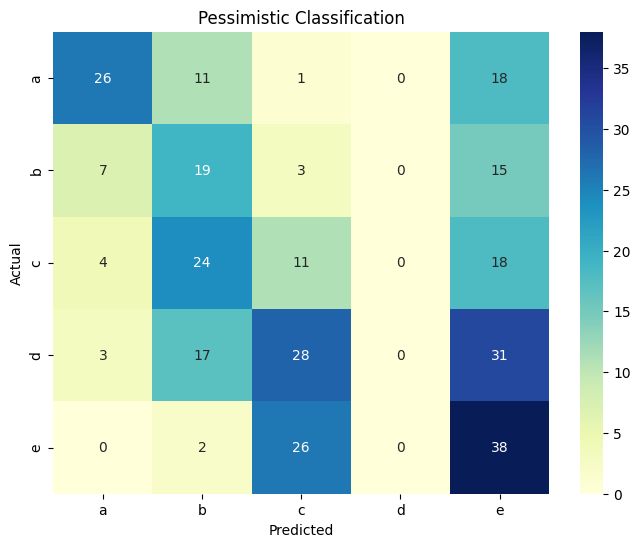

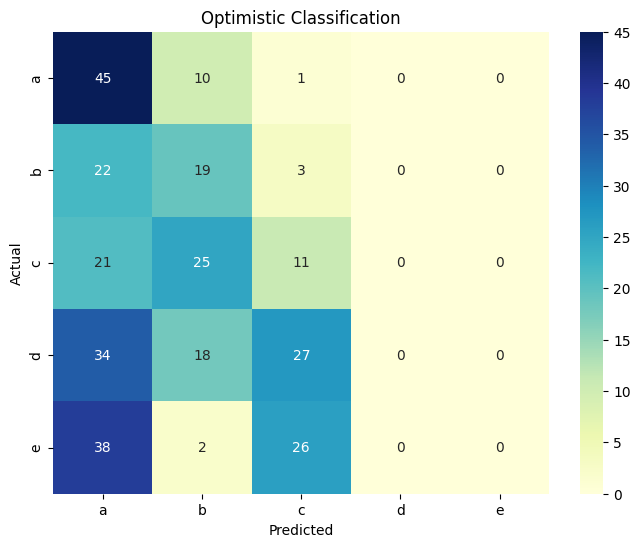

Classification Report for Pessimistic Classification:
              precision    recall  f1-score   support

           a       0.65      0.46      0.54        56
           b       0.26      0.43      0.32        44
           c       0.16      0.19      0.17        57
           d       0.00      0.00      0.00        79
           e       0.32      0.58      0.41        66

    accuracy                           0.31       302
   macro avg       0.28      0.33      0.29       302
weighted avg       0.26      0.31      0.27       302

Classification Report for Optimistic Classification:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

              precision    recall  f1-score   support

           a       0.28      0.80      0.42        56
           b       0.26      0.43      0.32        44
           c       0.16      0.19      0.18        57
           d       0.00      0.00      0.00        79
           e       0.00      0.00      0.00        66

    accuracy                           0.25       302
   macro avg       0.14      0.29      0.18       302
weighted avg       0.12      0.25      0.16       302

Pessimistic Overall Metrics: {'Accuracy': 0.31125827814569534, 'Precision': 0.2577450705836413, 'Recall': 0.31125827814569534, 'F1-Score': 0.2700134255357498}
Optimistic Overall Metrics: {'Accuracy': 0.31125827814569534, 'Precision': 0.2577450705836413, 'Recall': 0.31125827814569534, 'F1-Score': 0.2700134255357498}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Results saved to /content/drive/MyDrive/Colab Notebooks/DM_Sacaly/food_data_classified3.xlsx


In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# File paths
input_file = "/content/drive/MyDrive/Colab Notebooks/DM_Sacaly/food_data_cleaned1.xlsx"
output_file = "/content/drive/MyDrive/Colab Notebooks/DM_Sacaly/food_data_classified3.xlsx"

# Load the data
data = pd.read_excel(input_file)

# Features to analyze
features = [
    "Energy (KJ/100g)", "Sugars (g/100g)", "Saturated Fat (g/100g)",
    "Salt (g/100g)", "Proteins (g/100g)", "Fiber (g/100g)", "Fruit/Veg (%)"
]

# Weights
weights = {
    "Energy (KJ/100g)": 4,
    "Sugars (g/100g)": 3,
    "Saturated Fat (g/100g)": 3,
    "Salt (g/100g)": 3,
    "Proteins (g/100g)": 2,
    "Fiber (g/100g)": 2,
    "Fruit/Veg (%)": 1
}

# Calculate quintiles and thresholds
thresholds = {}
for feature in features:
    thresholds[feature] = data[feature].quantile([0.2, 0.4, 0.6, 0.8]).round(2).tolist()

# Adjust thresholds for features that should be maximized
for feature in ["Proteins (g/100g)", "Fiber (g/100g)", "Fruit/Veg (%)"]:
    thresholds[feature].reverse()

# Function to calculate concordance index
def calculate_concordance(row, weights, profile, criteria):
    concordance = 0
    total_weight = sum(weights.values())
    for criterion in criteria:
        if weights[criterion] > 0:  # If the criterion is important
            if row[criterion] >= profile[criterion]:  # At least as good for minimization
                concordance += weights[criterion]
    return concordance / total_weight

def pessimistic_sorting(data, thresholds, lambda_threshold, weights, labels):
    classifications = []
    for _, row in data.iterrows():
        assigned_label = labels[-1]  # Default to the worst category
        for k in range(len(labels) - 1, -1, -1):  # From best to worst
            profile = {criterion: thresholds[criterion][min(k, len(thresholds[criterion]) - 1)] for criterion in thresholds}
            concordance = calculate_concordance(row, weights, profile, thresholds.keys())
            if concordance >= lambda_threshold:
                assigned_label = labels[k]
                break
        classifications.append(assigned_label)
    return classifications

def optimistic_sorting(data, thresholds, lambda_threshold, weights, labels):
    classifications = []
    for _, row in data.iterrows():
        assigned_label = labels[0]  # Default to the best category
        for k in range(len(labels)):  # From worst to best
            profile = {criterion: thresholds[criterion][min(k, len(thresholds[criterion]) - 1)] for criterion in thresholds}
            concordance = calculate_concordance(row, weights, profile, thresholds.keys())
            if concordance < lambda_threshold:
                assigned_label = labels[max(0, k - 1)]
                break
        classifications.append(assigned_label)
    return classifications

# Nutri-Score labels
labels = ["a", "b", "c", "d", "e"]

# Lambda threshold
lambda_threshold = 0.5

# Perform pessimistic and optimistic sorting
data["Pessimistic Classification"] = pessimistic_sorting(data, thresholds, lambda_threshold, weights, labels)
data["Optimistic Classification"] = optimistic_sorting(data, thresholds, lambda_threshold, weights, labels)

# Compare with real Nutri-Score using confusion matrices
def plot_confusion_matrix(true_labels, predicted_labels, title):
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Confusion matrix for pessimistic classification
plot_confusion_matrix(data["Nutri-Score"], data["Pessimistic Classification"], "Pessimistic Classification")

# Confusion matrix for optimistic classification
plot_confusion_matrix(data["Nutri-Score"], data["Optimistic Classification"], "Optimistic Classification")

# Generate classification report for both methods
print("Classification Report for Pessimistic Classification:")
pessimistic_report = classification_report(data["Nutri-Score"], data["Pessimistic Classification"], labels=labels, output_dict=True)
print(classification_report(data["Nutri-Score"], data["Pessimistic Classification"], labels=labels))

print("Classification Report for Optimistic Classification:")
optimistic_report = classification_report(data["Nutri-Score"], data["Optimistic Classification"], labels=labels, output_dict=True)
print(classification_report(data["Nutri-Score"], data["Optimistic Classification"], labels=labels))

# Calculate overall metrics for each classification
def calculate_overall_metrics(report):
    precision = precision_score(data["Nutri-Score"], data["Pessimistic Classification"], labels=labels, average="weighted")
    recall = recall_score(data["Nutri-Score"], data["Pessimistic Classification"], labels=labels, average="weighted")
    f1 = f1_score(data["Nutri-Score"], data["Pessimistic Classification"], labels=labels, average="weighted")
    accuracy = accuracy_score(data["Nutri-Score"], data["Pessimistic Classification"])
    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1}

pessimistic_overall_metrics = calculate_overall_metrics(pessimistic_report)
optimistic_overall_metrics = calculate_overall_metrics(optimistic_report)

print("Pessimistic Overall Metrics:", pessimistic_overall_metrics)
print("Optimistic Overall Metrics:", optimistic_overall_metrics)

# Save results to Excel
data.to_excel(output_file, index=False)
print(f"Results saved to {output_file}")


## This part we used our weight(1,1,1,1,4,4,1)

Here it also followed $\lambda$ in increasing order from 0.5 to 0.7.

Thresholds for each feature:
   Energy (KJ/100g)  Sugars (g/100g)  Saturated Fat (g/100g)  Salt (g/100g)  \
0            1402.6             2.50                    0.80           0.06   
1            1670.8             7.18                    2.24           0.30   
2            1905.6            18.60                    6.76           0.65   
3            2190.0            31.80                   15.90           1.00   

   Proteins (g/100g)  Fiber (g/100g)  Fruit/Veg (%)  
0               11.0            7.13            0.0  
1                8.6            4.80            0.0  
2                7.1            2.80            0.0  
3                5.3            0.50            0.0  


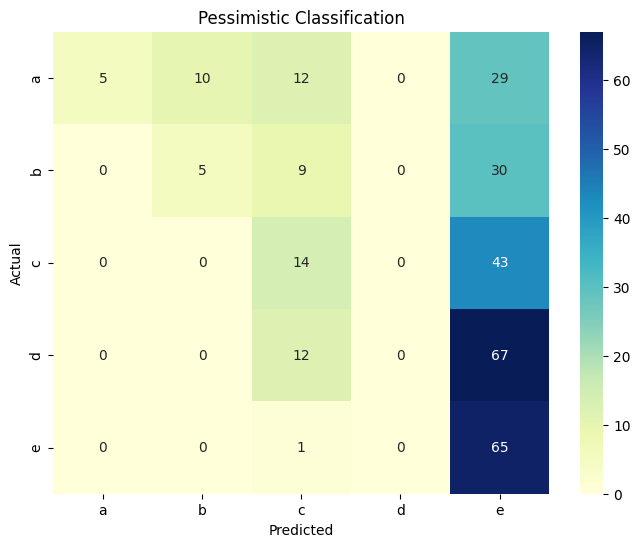

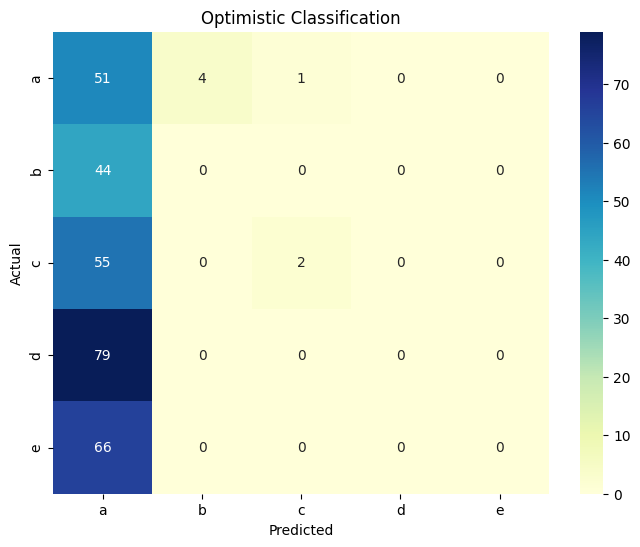

Classification Report for Pessimistic Classification:
              precision    recall  f1-score   support

           a       1.00      0.09      0.16        56
           b       0.33      0.11      0.17        44
           c       0.29      0.25      0.27        57
           d       0.00      0.00      0.00        79
           e       0.28      0.98      0.43        66

    accuracy                           0.29       302
   macro avg       0.38      0.29      0.21       302
weighted avg       0.35      0.29      0.20       302

Classification Report for Optimistic Classification:
              precision    recall  f1-score   support

           a       0.17      0.91      0.29        56
           b       0.00      0.00      0.00        44
           c       0.67      0.04      0.07        57
           d       0.00      0.00      0.00        79
           e       0.00      0.00      0.00        66

    accuracy                           0.18       302
   macro avg       0.17 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Results saved to /content/drive/MyDrive/Colab Notebooks/DM_Sacaly/food_data_classified4.xlsx


In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# File paths
input_file = "/content/drive/MyDrive/Colab Notebooks/DM_Sacaly/food_data_cleaned1.xlsx"
output_file = "/content/drive/MyDrive/Colab Notebooks/DM_Sacaly/food_data_classified4.xlsx"

# Load the data
data = pd.read_excel(input_file)

# Features to analyze
features = [
    "Energy (KJ/100g)", "Sugars (g/100g)", "Saturated Fat (g/100g)",
    "Salt (g/100g)", "Proteins (g/100g)", "Fiber (g/100g)", "Fruit/Veg (%)"
]

# Weights
weights = {
    "Energy (KJ/100g)": 1,
    "Sugars (g/100g)": 1,
    "Saturated Fat (g/100g)": 1,
    "Salt (g/100g)": 1,
    "Proteins (g/100g)": 4,
    "Fiber (g/100g)": 4,
    "Fruit/Veg (%)": 1
}

# Calculate quintiles and thresholds
thresholds = {}
for feature in features:
    thresholds[feature] = data[feature].quantile([0.2, 0.4, 0.6, 0.8]).round(2).tolist()

# Adjust thresholds for features that should be maximized
for feature in ["Proteins (g/100g)", "Fiber (g/100g)", "Fruit/Veg (%)"]:
    thresholds[feature].reverse()

# Output thresholds
thresholds_df = pd.DataFrame(thresholds)
print("Thresholds for each feature:")
print(thresholds_df)

# Function to calculate concordance index
def calculate_concordance(row, weights, profile, criteria):
    concordance = 0
    total_weight = sum(weights.values())
    for criterion in criteria:
        if weights[criterion] > 0:  # If the criterion is important
            if row[criterion] >= profile[criterion]:  # At least as good for minimization
                concordance += weights[criterion]
    return concordance / total_weight

def pessimistic_sorting(data, thresholds, lambda_threshold, weights, labels):
    classifications = []
    for _, row in data.iterrows():
        assigned_label = labels[-1]  # Default to the worst category
        for k in range(len(labels) - 1, -1, -1):  # From best to worst
            profile = {criterion: thresholds[criterion][min(k, len(thresholds[criterion]) - 1)] for criterion in thresholds}
            concordance = calculate_concordance(row, weights, profile, thresholds.keys())
            if concordance >= lambda_threshold:
                assigned_label = labels[k]
                break
        classifications.append(assigned_label)
    return classifications

def optimistic_sorting(data, thresholds, lambda_threshold, weights, labels):
    classifications = []
    for _, row in data.iterrows():
        assigned_label = labels[0]  # Default to the best category
        for k in range(len(labels)):  # From worst to best
            profile = {criterion: thresholds[criterion][min(k, len(thresholds[criterion]) - 1)] for criterion in thresholds}
            concordance = calculate_concordance(row, weights, profile, thresholds.keys())
            if concordance < lambda_threshold:
                assigned_label = labels[max(0, k - 1)]
                break
        classifications.append(assigned_label)
    return classifications

# Nutri-Score labels
labels = ["a", "b", "c", "d", "e"]

# Lambda threshold
lambda_threshold = 0.7

# Perform pessimistic and optimistic sorting
data["Pessimistic Classification"] = pessimistic_sorting(data, thresholds, lambda_threshold, weights, labels)
data["Optimistic Classification"] = optimistic_sorting(data, thresholds, lambda_threshold, weights, labels)

# Compare with real Nutri-Score using confusion matrices
def plot_confusion_matrix(true_labels, predicted_labels, title):
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Confusion matrix for pessimistic classification
plot_confusion_matrix(data["Nutri-Score"], data["Pessimistic Classification"], "Pessimistic Classification")

# Confusion matrix for optimistic classification
plot_confusion_matrix(data["Nutri-Score"], data["Optimistic Classification"], "Optimistic Classification")

# Generate classification report for both methods
print("Classification Report for Pessimistic Classification:")
print(classification_report(data["Nutri-Score"], data["Pessimistic Classification"], labels=labels))

print("Classification Report for Optimistic Classification:")
print(classification_report(data["Nutri-Score"], data["Optimistic Classification"], labels=labels))

# Save results to Excel
data.to_excel(output_file, index=False)
print(f"Results saved to {output_file}")


Thresholds for each feature:
   Energy (KJ/100g)  Sugars (g/100g)  Saturated Fat (g/100g)  Salt (g/100g)  \
0            1402.6             2.50                    0.80           0.06   
1            1670.8             7.18                    2.24           0.30   
2            1905.6            18.60                    6.76           0.65   
3            2190.0            31.80                   15.90           1.00   

   Proteins (g/100g)  Fiber (g/100g)  Fruit/Veg (%)  
0               11.0            7.13            0.0  
1                8.6            4.80            0.0  
2                7.1            2.80            0.0  
3                5.3            0.50            0.0  


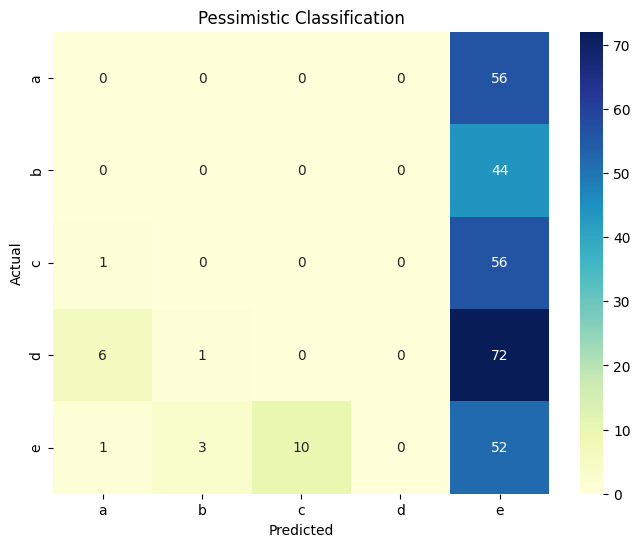

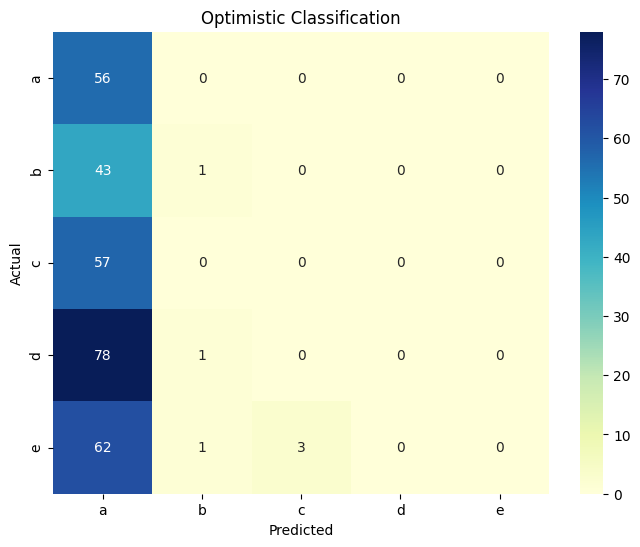

Classification Report for Pessimistic Classification:
              precision    recall  f1-score   support

           a       0.00      0.00      0.00        56
           b       0.00      0.00      0.00        44
           c       0.00      0.00      0.00        57
           d       0.00      0.00      0.00        79
           e       0.19      0.79      0.30        66

    accuracy                           0.17       302
   macro avg       0.04      0.16      0.06       302
weighted avg       0.04      0.17      0.07       302

Classification Report for Optimistic Classification:
              precision    recall  f1-score   support

           a       0.19      1.00      0.32        56
           b       0.33      0.02      0.04        44
           c       0.00      0.00      0.00        57
           d       0.00      0.00      0.00        79
           e       0.00      0.00      0.00        66

    accuracy                           0.19       302
   macro avg       0.10 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Results saved to /content/drive/MyDrive/Colab Notebooks/DM_Sacaly/food_data_classified5.xlsx


In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# File paths
input_file = "/content/drive/MyDrive/Colab Notebooks/DM_Sacaly/food_data_cleaned1.xlsx"
output_file = "/content/drive/MyDrive/Colab Notebooks/DM_Sacaly/food_data_classified5.xlsx"

# Load the data
data = pd.read_excel(input_file)

# Features to analyze
features = [
    "Energy (KJ/100g)", "Sugars (g/100g)", "Saturated Fat (g/100g)",
    "Salt (g/100g)", "Proteins (g/100g)", "Fiber (g/100g)", "Fruit/Veg (%)"
]

# Weights
weights = {
    "Energy (KJ/100g)": 1,
    "Sugars (g/100g)": 1,
    "Saturated Fat (g/100g)": 1,
    "Salt (g/100g)": 1,
    "Proteins (g/100g)": 4,
    "Fiber (g/100g)": 4,
    "Fruit/Veg (%)": 1
}

# Calculate quintiles and thresholds
thresholds = {}
for feature in features:
    thresholds[feature] = data[feature].quantile([0.2, 0.4, 0.6, 0.8]).round(2).tolist()

# Adjust thresholds for features that should be maximized
for feature in ["Proteins (g/100g)", "Fiber (g/100g)", "Fruit/Veg (%)"]:
    thresholds[feature].reverse()

# Output thresholds
thresholds_df = pd.DataFrame(thresholds)
print("Thresholds for each feature:")
print(thresholds_df)

# Function to calculate concordance index
def calculate_concordance(row, weights, profile, criteria):
    concordance = 0
    total_weight = sum(weights.values())
    for criterion in criteria:
        if weights[criterion] > 0:  # If the criterion is important
            if row[criterion] >= profile[criterion]:  # At least as good for minimization
                concordance += weights[criterion]
    return concordance / total_weight

def pessimistic_sorting(data, thresholds, lambda_threshold, weights, labels):
    classifications = []
    for _, row in data.iterrows():
        assigned_label = labels[-1]  # Default to the worst category
        for k in range(len(labels) - 1, -1, -1):  # From best to worst
            profile = {criterion: thresholds[criterion][min(k, len(thresholds[criterion]) - 1)] for criterion in thresholds}
            concordance = calculate_concordance(row, weights, profile, thresholds.keys())
            if concordance >= lambda_threshold:
                assigned_label = labels[k]
                break
        classifications.append(assigned_label)
    return classifications

def optimistic_sorting(data, thresholds, lambda_threshold, weights, labels):
    classifications = []
    for _, row in data.iterrows():
        assigned_label = labels[0]  # Default to the best category
        for k in range(len(labels)):  # From worst to best
            profile = {criterion: thresholds[criterion][min(k, len(thresholds[criterion]) - 1)] for criterion in thresholds}
            concordance = calculate_concordance(row, weights, profile, thresholds.keys())
            if concordance < lambda_threshold:
                assigned_label = labels[max(0, k - 1)]
                break
        classifications.append(assigned_label)
    return classifications

# Nutri-Score labels
labels = ["a", "b", "c", "d", "e"]

# Lambda threshold
lambda_threshold = 0.6

# Perform pessimistic and optimistic sorting
data["Pessimistic Classification"] = pessimistic_sorting(data, thresholds, lambda_threshold, weights, labels)
data["Optimistic Classification"] = optimistic_sorting(data, thresholds, lambda_threshold, weights, labels)

# Compare with real Nutri-Score using confusion matrices
def plot_confusion_matrix(true_labels, predicted_labels, title):
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Confusion matrix for pessimistic classification
plot_confusion_matrix(data["Nutri-Score"], data["Pessimistic Classification"], "Pessimistic Classification")

# Confusion matrix for optimistic classification
plot_confusion_matrix(data["Nutri-Score"], data["Optimistic Classification"], "Optimistic Classification")

# Generate classification report for both methods
print("Classification Report for Pessimistic Classification:")
print(classification_report(data["Nutri-Score"], data["Pessimistic Classification"], labels=labels))

print("Classification Report for Optimistic Classification:")
print(classification_report(data["Nutri-Score"], data["Optimistic Classification"], labels=labels))

# Save results to Excel
data.to_excel(output_file, index=False)
print(f"Results saved to {output_file}")


Thresholds for each feature:
   Energy (KJ/100g)  Sugars (g/100g)  Saturated Fat (g/100g)  Salt (g/100g)  \
0            1402.6             2.50                    0.80           0.06   
1            1670.8             7.18                    2.24           0.30   
2            1905.6            18.60                    6.76           0.65   
3            2190.0            31.80                   15.90           1.00   

   Proteins (g/100g)  Fiber (g/100g)  Fruit/Veg (%)  
0               11.0            7.13            0.0  
1                8.6            4.80            0.0  
2                7.1            2.80            0.0  
3                5.3            0.50            0.0  


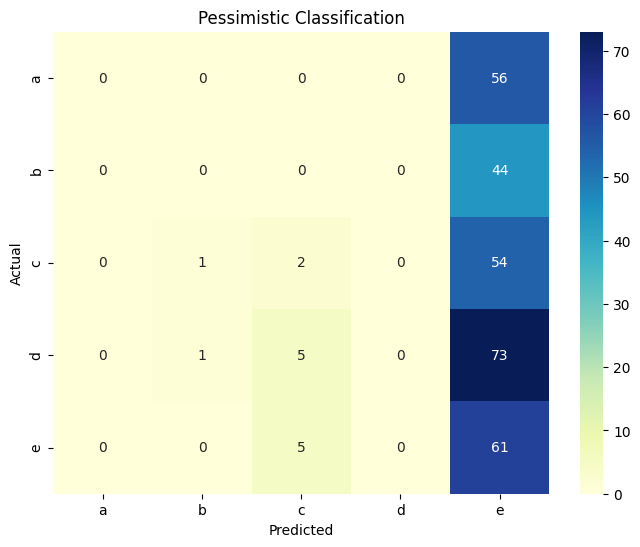

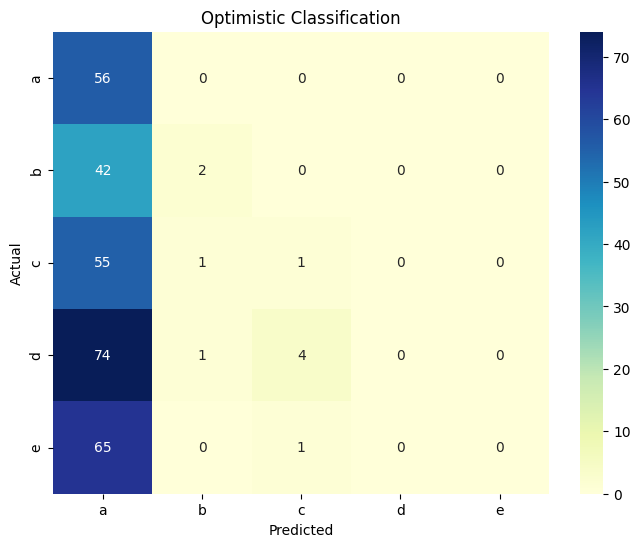

Classification Report for Pessimistic Classification:
              precision    recall  f1-score   support

           a       0.00      0.00      0.00        56
           b       0.00      0.00      0.00        44
           c       0.17      0.04      0.06        57
           d       0.00      0.00      0.00        79
           e       0.21      0.92      0.34        66

    accuracy                           0.21       302
   macro avg       0.08      0.19      0.08       302
weighted avg       0.08      0.21      0.09       302

Classification Report for Optimistic Classification:
              precision    recall  f1-score   support

           a       0.19      1.00      0.32        56
           b       0.50      0.05      0.08        44
           c       0.17      0.02      0.03        57
           d       0.00      0.00      0.00        79
           e       0.00      0.00      0.00        66

    accuracy                           0.20       302
   macro avg       0.17 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Results saved to /content/drive/MyDrive/Colab Notebooks/DM_Sacaly/food_data_classified6.xlsx


In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# File paths
input_file = "/content/drive/MyDrive/Colab Notebooks/DM_Sacaly/food_data_cleaned1.xlsx"
output_file = "/content/drive/MyDrive/Colab Notebooks/DM_Sacaly/food_data_classified6.xlsx"

# Load the data
data = pd.read_excel(input_file)

# Features to analyze
features = [
    "Energy (KJ/100g)", "Sugars (g/100g)", "Saturated Fat (g/100g)",
    "Salt (g/100g)", "Proteins (g/100g)", "Fiber (g/100g)", "Fruit/Veg (%)"
]

# Weights
weights = {
    "Energy (KJ/100g)": 1,
    "Sugars (g/100g)": 1,
    "Saturated Fat (g/100g)": 1,
    "Salt (g/100g)": 1,
    "Proteins (g/100g)": 4,
    "Fiber (g/100g)": 4,
    "Fruit/Veg (%)": 1
}

# Calculate quintiles and thresholds
thresholds = {}
for feature in features:
    thresholds[feature] = data[feature].quantile([0.2, 0.4, 0.6, 0.8]).round(2).tolist()

# Adjust thresholds for features that should be maximized
for feature in ["Proteins (g/100g)", "Fiber (g/100g)", "Fruit/Veg (%)"]:
    thresholds[feature].reverse()

# Output thresholds
thresholds_df = pd.DataFrame(thresholds)
print("Thresholds for each feature:")
print(thresholds_df)

# Function to calculate concordance index
def calculate_concordance(row, weights, profile, criteria):
    concordance = 0
    total_weight = sum(weights.values())
    for criterion in criteria:
        if weights[criterion] > 0:  # If the criterion is important
            if row[criterion] >= profile[criterion]:  # At least as good for minimization
                concordance += weights[criterion]
    return concordance / total_weight

def pessimistic_sorting(data, thresholds, lambda_threshold, weights, labels):
    classifications = []
    for _, row in data.iterrows():
        assigned_label = labels[-1]  # Default to the worst category
        for k in range(len(labels) - 1, -1, -1):  # From best to worst
            profile = {criterion: thresholds[criterion][min(k, len(thresholds[criterion]) - 1)] for criterion in thresholds}
            concordance = calculate_concordance(row, weights, profile, thresholds.keys())
            if concordance >= lambda_threshold:
                assigned_label = labels[k]
                break
        classifications.append(assigned_label)
    return classifications

def optimistic_sorting(data, thresholds, lambda_threshold, weights, labels):
    classifications = []
    for _, row in data.iterrows():
        assigned_label = labels[0]  # Default to the best category
        for k in range(len(labels)):  # From worst to best
            profile = {criterion: thresholds[criterion][min(k, len(thresholds[criterion]) - 1)] for criterion in thresholds}
            concordance = calculate_concordance(row, weights, profile, thresholds.keys())
            if concordance < lambda_threshold:
                assigned_label = labels[max(0, k - 1)]
                break
        classifications.append(assigned_label)
    return classifications

# Nutri-Score labels
labels = ["a", "b", "c", "d", "e"]

# Lambda threshold
lambda_threshold = 0.5

# Perform pessimistic and optimistic sorting
data["Pessimistic Classification"] = pessimistic_sorting(data, thresholds, lambda_threshold, weights, labels)
data["Optimistic Classification"] = optimistic_sorting(data, thresholds, lambda_threshold, weights, labels)

# Compare with real Nutri-Score using confusion matrices
def plot_confusion_matrix(true_labels, predicted_labels, title):
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Confusion matrix for pessimistic classification
plot_confusion_matrix(data["Nutri-Score"], data["Pessimistic Classification"], "Pessimistic Classification")

# Confusion matrix for optimistic classification
plot_confusion_matrix(data["Nutri-Score"], data["Optimistic Classification"], "Optimistic Classification")

# Generate classification report for both methods
print("Classification Report for Pessimistic Classification:")
print(classification_report(data["Nutri-Score"], data["Pessimistic Classification"], labels=labels))

print("Classification Report for Optimistic Classification:")
print(classification_report(data["Nutri-Score"], data["Optimistic Classification"], labels=labels))

# Save results to Excel
data.to_excel(output_file, index=False)
print(f"Results saved to {output_file}")
